In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


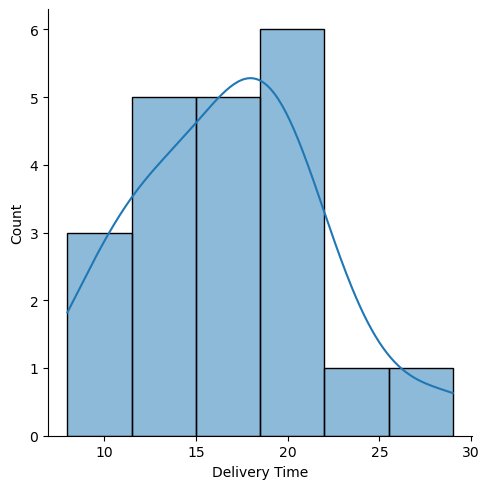

In [6]:
import seaborn as sns
sns.displot(data['Delivery Time'],kde=True)

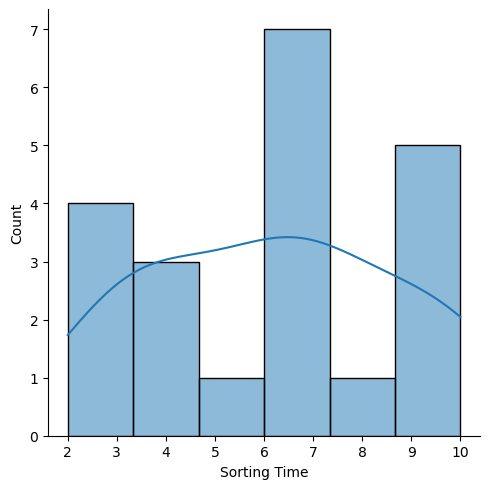

In [7]:
sns.displot(data['Sorting Time'],kde=True)

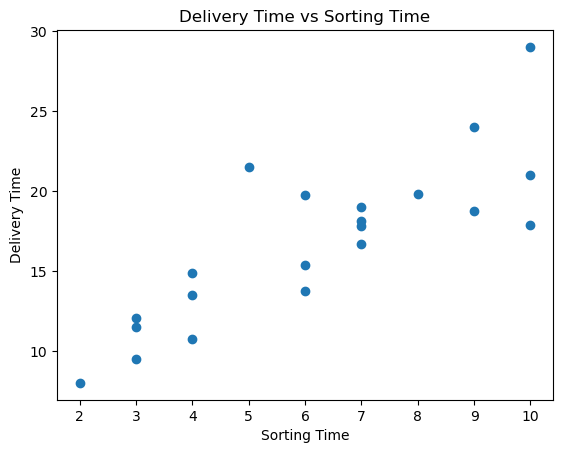

In [8]:
# Plotting the scatter plot to visualize the relationship
plt.scatter(data['Sorting Time'], data['Delivery Time'])
plt.title('Delivery Time vs Sorting Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [9]:
import statsmodels.formula.api as smf
model = smf.ols("Q('Delivery Time') ~ Q('Sorting Time')",data = data).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q('Delivery Time')   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                        11:21:45   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.5827      1.722      3.823      0.001       2.979      10.186
Q('Sorting Time')     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

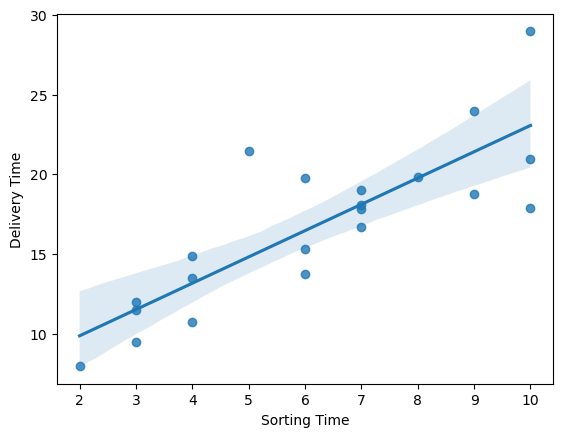

In [11]:
sns.regplot(x="Sorting Time", y="Delivery Time", data=data);

In [13]:
#Coefficients
model.params

Intercept            6.582734
Q('Sorting Time')    1.649020
dtype: float64

In [ ]:
(1.649020*23+6.582734)

In [14]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept            3.823349
Q('Sorting Time')    6.387447
dtype: float64 
 Intercept            0.001147
Q('Sorting Time')    0.000004
dtype: float64


In [15]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [17]:
newdata=pd.Series([26,35])

In [18]:
data_pred=pd.DataFrame(newdata,columns=['Sorting Time'])

In [19]:
model.predict(data_pred)

0    49.457251
1    64.298430
dtype: float64

# Log Transformation

In [21]:
np.log(data['Sorting Time'])

0     2.302585
1     1.386294
2     1.791759
3     2.197225
4     2.302585
5     1.791759
6     1.945910
7     1.098612
8     2.302585
9     2.197225
10    2.079442
11    1.386294
12    1.945910
13    1.098612
14    1.098612
15    1.386294
16    1.791759
17    1.945910
18    0.693147
19    1.945910
20    1.609438
Name: Sorting Time, dtype: float64

In [23]:
data['log_Sorting Time'] = np.log(data['Sorting Time'])
data

,Delivery Time,Sorting Time,log_Sorting Time
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585
5,15.35,6,1.791759
6,19.00,7,1.945910
7,9.50,3,1.098612
8,17.90,10,2.302585
9,18.75,9,2.197225


In [24]:
data['log_Delivery Time'] = np.log(data['Delivery Time'])
data

,Delivery Time,Sorting Time,log_Sorting Time,log_Delivery Time
0,21.00,10,2.302585,3.044522
1,13.50,4,1.386294,2.602690
2,19.75,6,1.791759,2.983153
3,24.00,9,2.197225,3.178054
4,29.00,10,2.302585,3.367296
5,15.35,6,1.791759,2.731115
6,19.00,7,1.945910,2.944439
7,9.50,3,1.098612,2.251292
8,17.90,10,2.302585,2.884801
9,18.75,9,2.197225,2.931194


C:\Users\Basud\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Basud\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


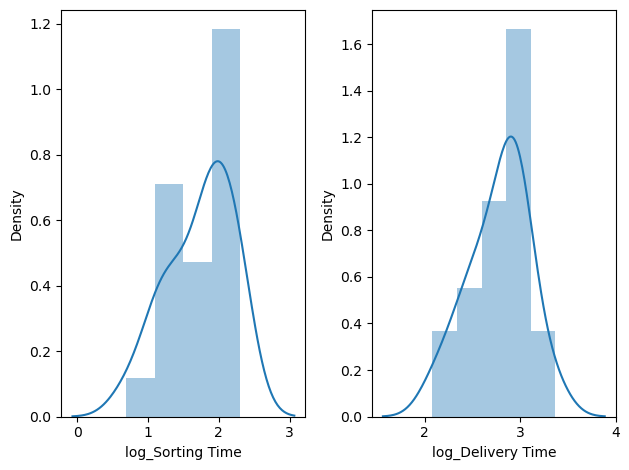

In [33]:
plt.subplot(1,2,1)
sns.distplot(data['log_Sorting Time'])

plt.subplot(1,2,2)
sns.distplot(data['log_Delivery Time'])

plt.tight_layout()

## Sqrt transformation

In [34]:
data['sqrt_Sorting Time'] = np.sqrt(data['Sorting Time'])
data['sqrt_Delivery Time'] = np.sqrt(data['Delivery Time'])
data

,Delivery Time,Sorting Time,log_Sorting Time,log_Delivery Time,sqrt_Sorting Time,sqrt_Delivery Time
0,21.00,10,2.302585,3.044522,3.162278,4.582576
1,13.50,4,1.386294,2.602690,2.000000,3.674235
2,19.75,6,1.791759,2.983153,2.449490,4.444097
3,24.00,9,2.197225,3.178054,3.000000,4.898979
4,29.00,10,2.302585,3.367296,3.162278,5.385165
5,15.35,6,1.791759,2.731115,2.449490,3.917908
6,19.00,7,1.945910,2.944439,2.645751,4.358899
7,9.50,3,1.098612,2.251292,1.732051,3.082207
8,17.90,10,2.302585,2.884801,3.162278,4.230839
9,18.75,9,2.197225,2.931194,3.000000,4.330127


C:\Users\Basud\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Basud\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


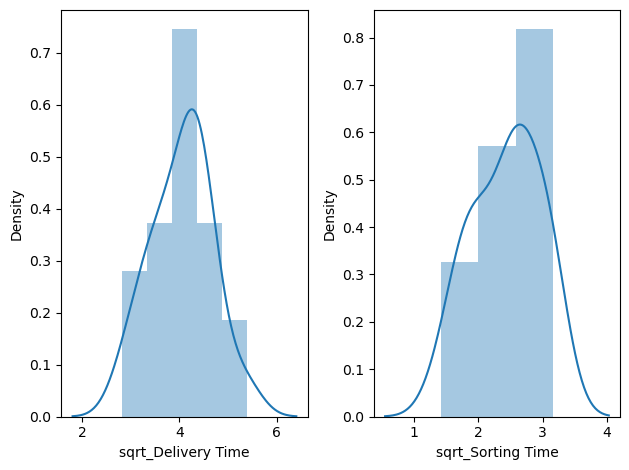

In [36]:
plt.subplot(1,2,1)
sns.distplot(data['sqrt_Delivery Time'])

plt.subplot(1,2,2)
sns.distplot(data['sqrt_Sorting Time'])

plt.tight_layout()

In [37]:
data['sqrt_Delivery Time'].skew()

-0.0618105135865213

In [38]:
data['sqrt_Sorting Time'].skew()

-0.25981634723613994